# Create Dataframes

In [1]:
import base64
import datetime
import json
import pandas as pd
import pickle
import pprint
import numpy as np
import requests
import time

In [2]:
olympic_cycling = pd.read_pickle("../data/archive/olympic_cycling.pkl")
# olympic_gynmastics_replies=pd.read_pickle("olympic_gynmastics_replies.pkl")

In [3]:
pd.set_option('expand_frame_repr', False)
original_tweets_df = pd.DataFrame(olympic_cycling)
original_tweets_df.head(5)

,id,created_at,conversation_id,text,source,lang,referenced_tweets,withheld
0,1424536982101790729,2021-08-09T01:04:17.000Z,1424536982101790729,The demise of British cycling has been greatly...,Twitter for iPhone,en,NaN,NaN
1,1424530437586571270,2021-08-09T00:38:17.000Z,1424530437586571270,#NSTsports GOLD may have slipped through their...,Twitter Web App,en,NaN,NaN
2,1424530087320461312,2021-08-09T00:36:53.000Z,1424529490466820102,3/ RBC Training Ground graduate Kelsey Mitche...,Twitter Web App,en,"[{'type': 'replied_to', 'id': '142452979036789...",NaN
3,1424529959272415237,2021-08-09T00:36:23.000Z,1424529959272415237,#NSTsports SHAH Firdaus Sahrom admitted that w...,Twitter Web App,en,NaN,NaN
4,1424524357729144832,2021-08-09T00:14:07.000Z,1424524357729144832,Great Britain tops #Tokyo2020 #Olympics cyclin...,SocialFlow,en,NaN,NaN


In [4]:
response_tweet_df = pd.DataFrame(olympic_gynmastics_replies)
response_tweet_df.head(5)

,referenced_tweets,source,created_at,id,lang,text,conversation_id
0,"[{'type': 'replied_to', 'id': '142452979036789...",Twitter Web App,2021-08-09T00:36:53.000Z,1424530087320461312,en,3/ RBC Training Ground graduate Kelsey Mitche...,1424529490466820102
1,"[{'type': 'replied_to', 'id': '142452949046682...",Twitter Web App,2021-08-09T00:35:43.000Z,1424529790367895553,en,2/ RBC Training Ground graduate Avalon Wasten...,1424529490466820102
2,"[{'type': 'replied_to', 'id': '142452979036789...",Twitter Web App,2021-08-09T00:36:53.000Z,1424530087320461312,en,3/ RBC Training Ground graduate Kelsey Mitche...,1424529490466820102
3,"[{'type': 'replied_to', 'id': '142452949046682...",Twitter Web App,2021-08-09T00:35:43.000Z,1424529790367895553,en,2/ RBC Training Ground graduate Avalon Wasten...,1424529490466820102
4,"[{'type': 'replied_to', 'id': '142452979036789...",Twitter Web App,2021-08-09T00:36:53.000Z,1424530087320461312,en,3/ RBC Training Ground graduate Kelsey Mitche...,1424529490466820102


# Convert Data Types

In [5]:
original_tweets_df.dtypes

id                   object
created_at           object
conversation_id      object
text                 object
source               object
lang                 object
referenced_tweets    object
withheld             object
dtype: object

In [6]:
response_tweet_df.dtypes

referenced_tweets    object
source               object
created_at           object
id                   object
lang                 object
text                 object
conversation_id      object
dtype: object

In [7]:
original_tweets_df=original_tweets_df.astype({'conversation_id':'int64','id':'int64'})
response_tweet_df=response_tweet_df.astype({'conversation_id':'int64','id':'int64'})

original_tweets_df['created_at'] = pd.to_datetime(original_tweets_df['created_at'])
response_tweet_df['created_at'] = pd.to_datetime(response_tweet_df['created_at'])

In [8]:
original_tweets_df.dtypes

id                                 int64
created_at           datetime64[ns, UTC]
conversation_id                    int64
text                              object
source                            object
lang                              object
referenced_tweets                 object
withheld                          object
dtype: object

In [9]:
response_tweet_df.dtypes

referenced_tweets                 object
source                            object
created_at           datetime64[ns, UTC]
id                                 int64
lang                              object
text                              object
conversation_id                    int64
dtype: object

Object types are already strings so no need to convert them.

# Handle None Values

In [10]:
original_tweets_df = original_tweets_df.fillna(value=np.nan)
response_tweet_df = response_tweet_df.fillna(value=np.nan)
print(len(original_tweets_df))
print(len(response_tweet_df))

4218
693


# Clean text
Lets start by showing what we're working with again after creating a new column for our clean text.

In [11]:
original_tweets_df['clean_text']=original_tweets_df['text']
original_tweets_df.head(5)

,id,created_at,conversation_id,text,source,lang,referenced_tweets,withheld,clean_text
0,1424536982101790729,2021-08-09 01:04:17+00:00,1424536982101790729,The demise of British cycling has been greatly...,Twitter for iPhone,en,NaN,NaN,The demise of British cycling has been greatly...
1,1424530437586571270,2021-08-09 00:38:17+00:00,1424530437586571270,#NSTsports GOLD may have slipped through their...,Twitter Web App,en,NaN,NaN,#NSTsports GOLD may have slipped through their...
2,1424530087320461312,2021-08-09 00:36:53+00:00,1424529490466820102,3/ RBC Training Ground graduate Kelsey Mitche...,Twitter Web App,en,"[{'type': 'replied_to', 'id': '142452979036789...",NaN,3/ RBC Training Ground graduate Kelsey Mitche...
3,1424529959272415237,2021-08-09 00:36:23+00:00,1424529959272415237,#NSTsports SHAH Firdaus Sahrom admitted that w...,Twitter Web App,en,NaN,NaN,#NSTsports SHAH Firdaus Sahrom admitted that w...
4,1424524357729144832,2021-08-09 00:14:07+00:00,1424524357729144832,Great Britain tops #Tokyo2020 #Olympics cyclin...,SocialFlow,en,NaN,NaN,Great Britain tops #Tokyo2020 #Olympics cyclin...


In [12]:
response_tweet_df['clean_text']=response_tweet_df['text']
response_tweet_df.head(5)

,referenced_tweets,source,created_at,id,lang,text,conversation_id,clean_text
0,"[{'type': 'replied_to', 'id': '142452979036789...",Twitter Web App,2021-08-09 00:36:53+00:00,1424530087320461312,en,3/ RBC Training Ground graduate Kelsey Mitche...,1424529490466820102,3/ RBC Training Ground graduate Kelsey Mitche...
1,"[{'type': 'replied_to', 'id': '142452949046682...",Twitter Web App,2021-08-09 00:35:43+00:00,1424529790367895553,en,2/ RBC Training Ground graduate Avalon Wasten...,1424529490466820102,2/ RBC Training Ground graduate Avalon Wasten...
2,"[{'type': 'replied_to', 'id': '142452979036789...",Twitter Web App,2021-08-09 00:36:53+00:00,1424530087320461312,en,3/ RBC Training Ground graduate Kelsey Mitche...,1424529490466820102,3/ RBC Training Ground graduate Kelsey Mitche...
3,"[{'type': 'replied_to', 'id': '142452949046682...",Twitter Web App,2021-08-09 00:35:43+00:00,1424529790367895553,en,2/ RBC Training Ground graduate Avalon Wasten...,1424529490466820102,2/ RBC Training Ground graduate Avalon Wasten...
4,"[{'type': 'replied_to', 'id': '142452979036789...",Twitter Web App,2021-08-09 00:36:53+00:00,1424530087320461312,en,3/ RBC Training Ground graduate Kelsey Mitche...,1424529490466820102,3/ RBC Training Ground graduate Kelsey Mitche...


First, puncuation, user mentions, and hashtags.

In [13]:
import re
user_mentions=re.compile("@[A-Za-z0-9]+")
hashtags=re.compile("#[A-Za-z0-9]+")
punctuation = re.compile(r'[^\w\s]+')
original_tweets_df['clean_text'] = [user_mentions.sub('', x) for x in original_tweets_df['clean_text'].tolist()]
response_tweet_df['clean_text'] = [user_mentions.sub('', x) for x in response_tweet_df['clean_text'].tolist()]
original_tweets_df['clean_text'] = [hashtags.sub('', x) for x in original_tweets_df['clean_text'].tolist()]
response_tweet_df['clean_text'] = [hashtags.sub('', x) for x in response_tweet_df['clean_text'].tolist()]
original_tweets_df['clean_text'] = [punctuation.sub('', x) for x in original_tweets_df['clean_text'].tolist()]
response_tweet_df['clean_text'] = [punctuation.sub('', x) for x in response_tweet_df['clean_text'].tolist()]

Remove any URLs

In [14]:
original_tweets_df['clean_text']=original_tweets_df['clean_text'].str.replace('http\S+|www.\S+', '', case=False)
response_tweet_df['clean_text']=response_tweet_df['clean_text'].str.replace('http\S+|www.\S+', '', case=False)

Remove stopwords.

In [15]:
from nltk.corpus import stopwords
stop = stopwords.words('english')
stop_removal=lambda x: ' '.join([word for word in x.split() if word not in (stop)])
original_tweets_df['clean_text'] = original_tweets_df['clean_text'].apply(stop_removal)
response_tweet_df['clean_text'] = response_tweet_df['clean_text'].apply(stop_removal)

Now we're gonna remove any data that doesn't include text after cleaning since we won't be able to do any sort of sentiment analysis down the road on it.

In [16]:
original_tweets_df = original_tweets_df.replace(r'^\s*$', np.nan, regex=True)
original_tweets_df.dropna(subset = ["clean_text"], inplace=True)
response_tweet_df = response_tweet_df.replace(r'^\s*$', np.nan, regex=True)
response_tweet_df.dropna(subset = ["clean_text"], inplace=True)

In [17]:
print(len(original_tweets_df))
print(len(response_tweet_df))

4191
594


A fair amount of tweets were removed from this process.
Our final step will be to simply convert casing.

In [18]:
original_tweets_df["clean_text"] = original_tweets_df["clean_text"].str.lower()
response_tweet_df["clean_text"] = response_tweet_df["clean_text"].str.lower()

# Word preparation
We will continue to work with our text data in order to get it ready to analyze.

In [19]:
from textblob import TextBlob
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /home/mrausms/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [22]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
original_tweets_df[['polarity', 'subjectivity']] = original_tweets_df['clean_text'].apply(lambda Text: pd.Series(TextBlob(Text).sentiment))
for index, row in original_tweets_df['clean_text'].iteritems():
    score = SentimentIntensityAnalyzer().polarity_scores(row)
    neg = score['neg']
    neu = score['neu']
    pos = score['pos']
    comp = score['compound']
    if neg > pos:
        original_tweets_df.loc[index, 'sentiment'] = 'negative'
    elif pos > neg:
        original_tweets_df.loc[index, 'sentiment'] = 'positive'
    else:
        original_tweets_df.loc[index, 'sentiment'] = 'neutral'
    original_tweets_df.loc[index, 'neg'] = neg
    original_tweets_df.loc[index, 'neu'] = neu
    original_tweets_df.loc[index, 'pos'] = pos
    original_tweets_df.loc[index, 'compound'] = comp
original_tweets_df.head(10)

,id,created_at,conversation_id,text,source,lang,referenced_tweets,withheld,clean_text,polarity,subjectivity,sentiment,neg,neu,pos,compound
0,1424536982101790729,2021-08-09 01:04:17+00:00,1424536982101790729,The demise of British cycling has been greatly...,Twitter for iPhone,en,NaN,NaN,the demise british cycling greatly exaggerated...,-0.250000,0.500000,positive,0.132,0.625,0.242,0.3415
1,1424530437586571270,2021-08-09 00:38:17+00:00,1424530437586571270,#NSTsports GOLD may have slipped through their...,Twitter Web App,en,NaN,NaN,gold may slipped grasp national track cycling ...,0.800000,1.000000,positive,0.000,0.838,0.162,0.4767
2,1424530087320461312,2021-08-09 00:36:53+00:00,1424529490466820102,3/ RBC Training Ground graduate Kelsey Mitche...,Twitter Web App,en,"[{'type': 'replied_to', 'id': '142452979036789...",NaN,3 rbc training ground graduate kelsey mitchell...,0.000000,0.000000,positive,0.000,0.595,0.405,0.7783
3,1424529959272415237,2021-08-09 00:36:23+00:00,1424529959272415237,#NSTsports SHAH Firdaus Sahrom admitted that w...,Twitter Web App,en,NaN,NaN,shah firdaus sahrom admitted watching teammate...,0.800000,0.400000,positive,0.060,0.556,0.384,0.7906
4,1424524357729144832,2021-08-09 00:14:07+00:00,1424524357729144832,Great Britain tops #Tokyo2020 #Olympics cyclin...,SocialFlow,en,NaN,NaN,great britain tops cycling medal table fending...,0.800000,0.750000,positive,0.000,0.430,0.570,0.9274
5,1424513383001436161,2021-08-08 23:30:31+00:00,1424513383001436161,#Olympics come to an end and #Messi says goodb...,Echobox,en,NaN,NaN,come end says goodbye sundays sporting social,0.033333,0.066667,neutral,0.000,1.000,0.000,0.0000
6,1424511966341591045,2021-08-08 23:24:53+00:00,1424511966341591045,Nice @Telegraph graphic to quickly visualise w...,Twitter for iPad,en,NaN,NaN,nice graphic quickly visualise sports leading ...,0.311111,0.633333,positive,0.000,0.742,0.258,0.7430
7,1424506739437756425,2021-08-08 23:04:07+00:00,1424502101669994506,Cc: @1BillyFloyd @jacksoncarp @k8talois @CDTA ...,Twitter for iPhone,und,"[{'type': 'replied_to', 'id': '142450210166999...",NaN,cc,0.000000,0.000000,neutral,0.000,1.000,0.000,0.0000
8,1424501065261764612,2021-08-08 22:41:34+00:00,1424501065261764612,"Inspiring: Four years ago, she didn't own a bi...",Twitter Web App,en,NaN,NaN,inspiring four years ago didnt bicycle now gol...,0.500000,1.000000,positive,0.000,0.604,0.396,0.7096
9,1424495783160782850,2021-08-08 22:20:35+00:00,1424495783160782850,I know it’s hard to choose but do you have a f...,Twitter for iPhone,en,NaN,NaN,i know hard choose favourite moment one mine w...,-0.291667,0.541667,negative,0.123,0.877,0.000,-0.1027


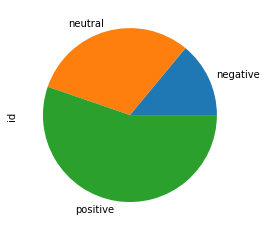

In [21]:
sentiment_data=original_tweets_df[['id','sentiment']]
df=sentiment_data.groupby('sentiment')['id'].count()
df.plot.pie()